# physics724: Advanced Methods of Data Analysis

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". Remember to delete the `raise NotImplementedError()` statements as you implement your solutions.

---

# Exercise 6: Model selection


This exercise is a continuation of Exercise 5.1.

Again we have some data in a CSV file (`data.csv`) with columns "x" and "y", and an unknown relationship between the variables.

Question 1 is identical to last week, and you may re-use your solution.

1) Perform curve fits to the data with polynomial functions of degree 1 to 8 and plot the predicted curve against the data points.

A polynomial of degree $n$ with coefficients $\vec{c} = (c_0, ... c_n)$ is simply
$$
f_n(x|\vec{c}) = \sum_{i=0}^n c_i x^i
$$

*Hint:* you can use [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfit.html) and [polyval](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyval.html) from NumPy.

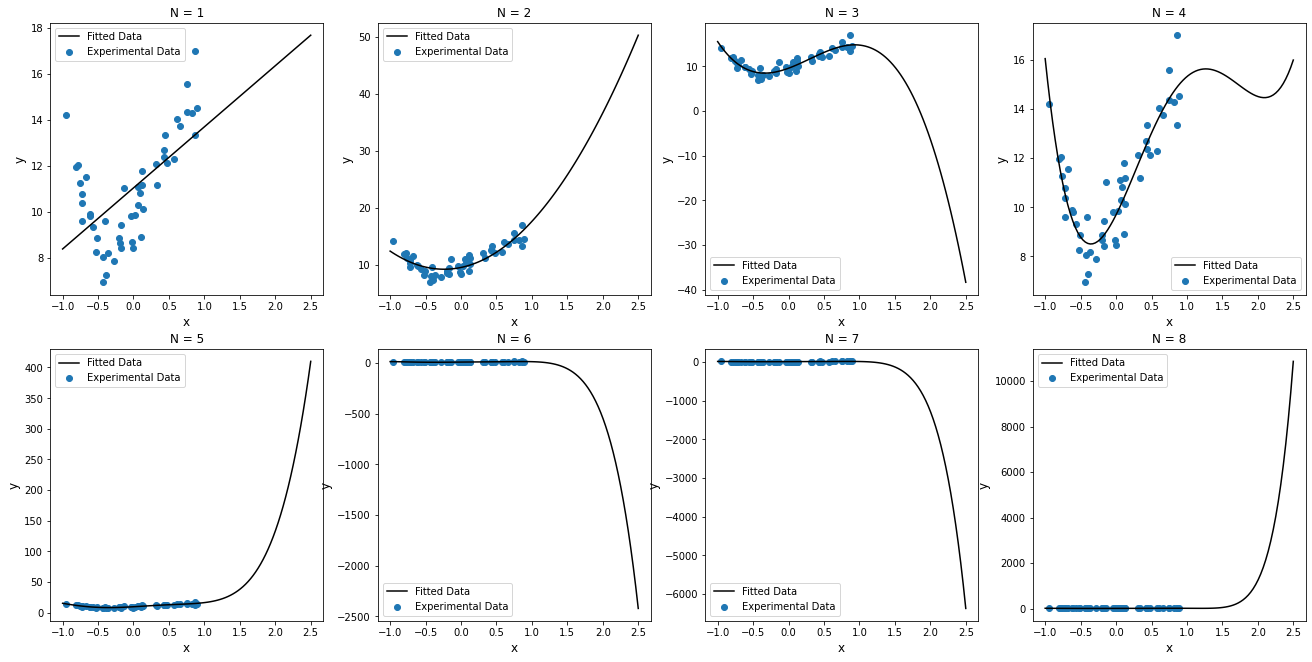

In [6]:
import pandas as pd
import numpy as np
from numpy.polynomial import polynomial as poly
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")
x_values = np.linspace(-1, 2.5, 100)
c = [[] for i in range(8)]
poly_fitted = [[] for i in range(8)]

for i in range(8):
    c[i] = poly.polyfit(df['x'],df['y'],i+1)
    poly_fitted[i] = poly.polyval(x_values,c[i])

x_values = np.linspace(-1, 2.5, 100)

fig,axs = plt.subplots(2,4,figsize=(22.5,11))
axs =axs.ravel()

for i in range(8):
    axs[i].scatter(df['x'],df['y'],label = 'Experimental Data')
    axs[i].plot(x_values,poly_fitted[i],'k-',label = 'Fitted Data')
    axs[i].set_xlabel('x',fontsize = 12)
    axs[i].set_ylabel('y',fontsize = 12)
    axs[i].set_title('N = '+str(i+1))
    axs[i].legend()    
plt.show()

Last week we tested the predictive power of the fitted models by taking the average $\chi^2$ evaluated on an ensemble of new datasets generated from the original "true" distribution.

This week we don't have the luxury of knowing the true distribution, so we must quantify the suitability of each model from the data alone.

We can do this using the Bayesian Information Criterion (BIC) and the Akaike Information Criterion (AIC) introduced in the lecture.

In the literature, AIC and BIC are usually defined using $-2 \ln(\mathcal{L})$ as the objective function, where $\mathcal{L}$  is the likelihood. For the sake of this exercise you may use $\chi^2 \approx -2 \ln(\mathcal{L})$.

2)

a) Plot AIC, BIC and $\chi^2$ of the fits performed in question 1 as a function of the number of free parameters.

No handles with labels found to put in legend.


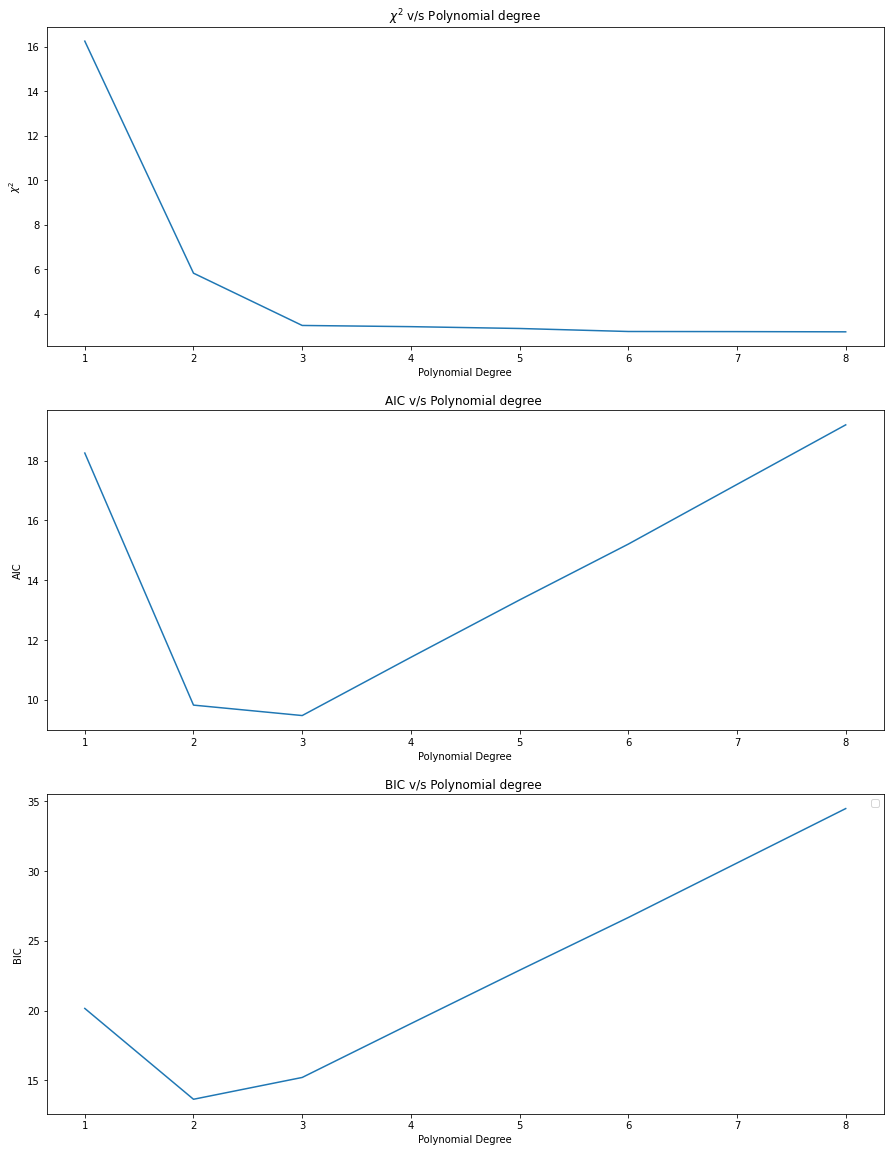

In [14]:
import math

def chi_sq(obs,exp):
    ch = np.sum((obs-exp)**2/exp)
    return float(ch)

def AIC(chisq,degree):
    return 2*degree + chisq

def BIC(chisq,degree,datapoints):
    return degree*math.log(datapoints,math.e) + chisq

eval_poly = [[] for i in range(8)]
chisq_val = []
AIC_val =   []
BIC_val =   []
for i in range(len(eval_poly)):
    eval_poly[i] = poly.polyval(df['x'],c[i])
    chisq_val.append(chi_sq(df['y'],eval_poly[i]))
    AIC_val.append(AIC(chisq_val[i],i+1))
    BIC_val.append(BIC(chisq_val[i],i+1,len(df['x'])))


fig,axs = plt.subplots(3,1,figsize=(15,20))
axs =axs.ravel()

axs[0].plot([i for i in range(1,9)],chisq_val)
axs[0].set_title(r'$\chi^2$ v/s Polynomial degree ')
axs[0].set_ylabel(r'$\chi^2$')
axs[0].set_xlabel('Polynomial Degree')

axs[1].plot([i for i in range(1,9)],AIC_val)
axs[1].set_title(r'AIC v/s Polynomial degree ')
axs[1].set_ylabel(r'AIC')
axs[1].set_xlabel('Polynomial Degree')

axs[2].plot([i for i in range(1,9)],BIC_val)
axs[2].set_title(r'BIC v/s Polynomial degree ')
axs[2].set_ylabel(r'BIC')
axs[2].set_xlabel('Polynomial Degree')
plt.legend()
plt.show()

b) How are the information criteria more useful than just picking the model that gives the best $\chi^2$?

c) How do AIC and BIC differ from one another qualitatively? In which situations would one be more appropriate than the other?

d) Which degree of polynomial would you choose as the best model of the data?

b) Best $\chi^2$ always involves the risk of over-fitting. An over-fitted model is bad at predicting.

c) AIC has $2k$ ($k$ is the number of parameters in the model) as the penalty whereas BIC has $k * ln(n)$ ($n$ is the number of data points). BIC hence takes both data-set size and model complexity into account. 

BIC is used to select the 'true model' when large $n$ is available. AIC is better for finding the best approximate model.

https://en.wikipedia.org/wiki/Akaike_information_criterion#Comparison_with_BIC

d) 3, using AIC. in our case, the set of candidate models is not exhaustive so it is safe to assume that the true model is not present in this set. Moreover, $n=50$ so BIC is would still be trustworthy even if the true model were present. We use AIC to give us best model.